In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from skimage import exposure
from skimage.filters import gaussian
from skimage.filters import sobel_h, sobel_v, sobel
from skimage.filters import laplace


# Laplaciano

## Preparación

### Cargue y visualice la imagen spot.png.

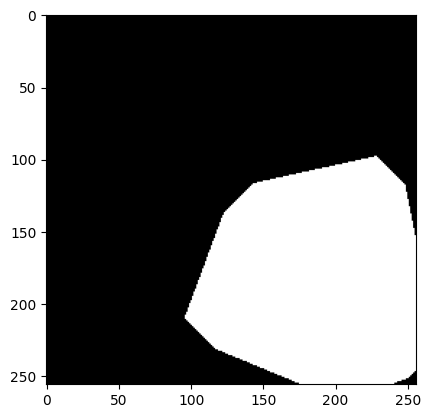

In [15]:
spot = cv2.imread("images/spot.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(spot, cmap= 'gray', vmin = 0, vmax= 255)
plt.show()

### Antes de aplicar el filtro Laplaciano es necesario modificar el tipo de la imagen para que esta pueda contener niveles de gris negativos. Convierta la imagen a tipo Int16.

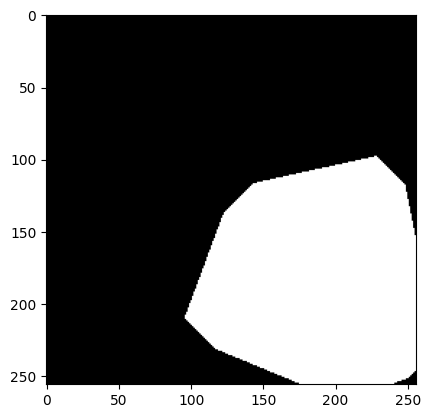

In [16]:
spot = spot.astype(np.int16)
plt.imshow(spot, cmap= 'gray', vmin = 0, vmax= 255)
plt.show()

## Filtro Laplaciano

### Aplique un filtro Laplaciano. Visualice el resultado ****(puede efectuar una calibración del histograma -entre 0 y 255- de la imagen obtenida para visualizar mejor los detalles de la imagen del Laplaciano).

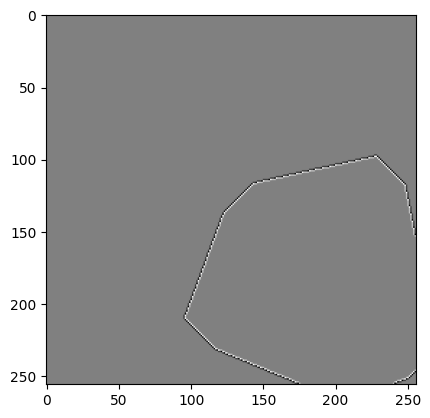

In [17]:
spot_l = laplace(spot, ksize=3)
plt.imshow(spot_l, cmap= 'gray')
plt.show()

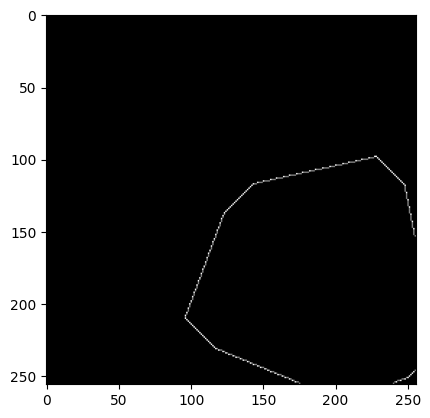

In [18]:
spot_l_r = exposure.rescale_intensity(spot_l, in_range=(0, 255))
plt.imshow(spot_l_r, cmap= 'gray')
plt.show()

### ¿Cómo es la respuesta del Laplaciano en las regiones homogéneas de la imagen y en los contornos? ¿A qué se debe este resultado

La respuesta en las regiones homogéneas es el color negro (0) y en los bordes es el color blanco (255). Esto se debe a que el Laplaciano encuentra el cambio de colores de la figura, y determina que el color más oscuro (el exterior de la figura) debe de ser negro y el borde más claro que ha encontrado (el inicio de la zona blanca) debe de ser blanco.

## Operador LoG (Laplacian of Gaussian):

### Ahora vamos a efectuar un filtrado gaussiano previo al cálculo del Laplaciano, lo cual es equivalente a aplicar el operador LoG (Laplacian of Gaussian) a la imagen original.

### Aplique un filtro Gaussiano con varianza en 0 a la imagen. Visualice el resultado.

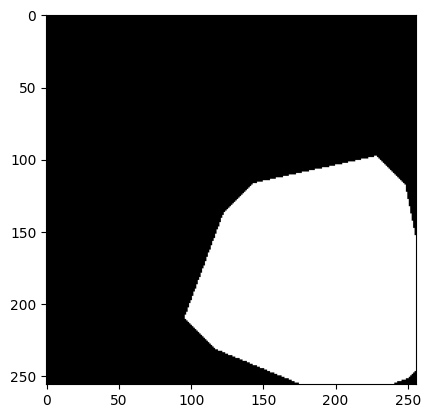

In [19]:
spot_g = gaussian(spot, sigma=0, preserve_range=True)
plt.imshow(spot_g, cmap= 'gray')
plt.show()

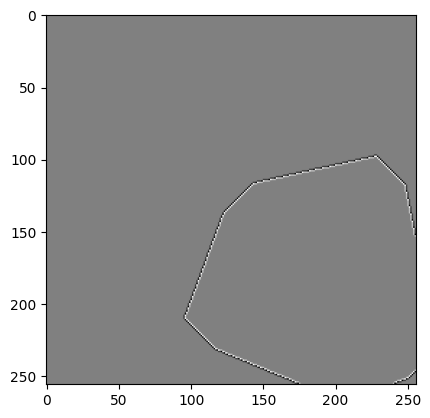

In [20]:
spot_g_l = laplace(spot_g, ksize=3)
plt.imshow(spot_g_l, cmap= 'gray')
plt.show()

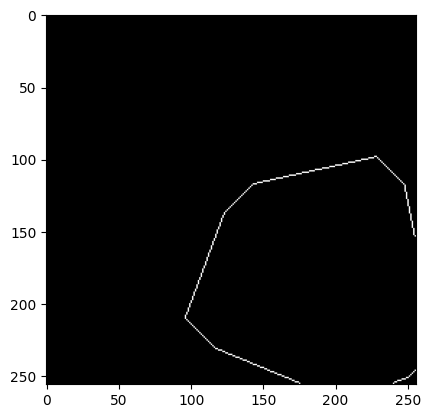

In [21]:
spot_g_l_r = exposure.rescale_intensity(spot_g_l, in_range=(0, 255))
plt.imshow(spot_g_l_r, cmap= 'gray')
plt.show()

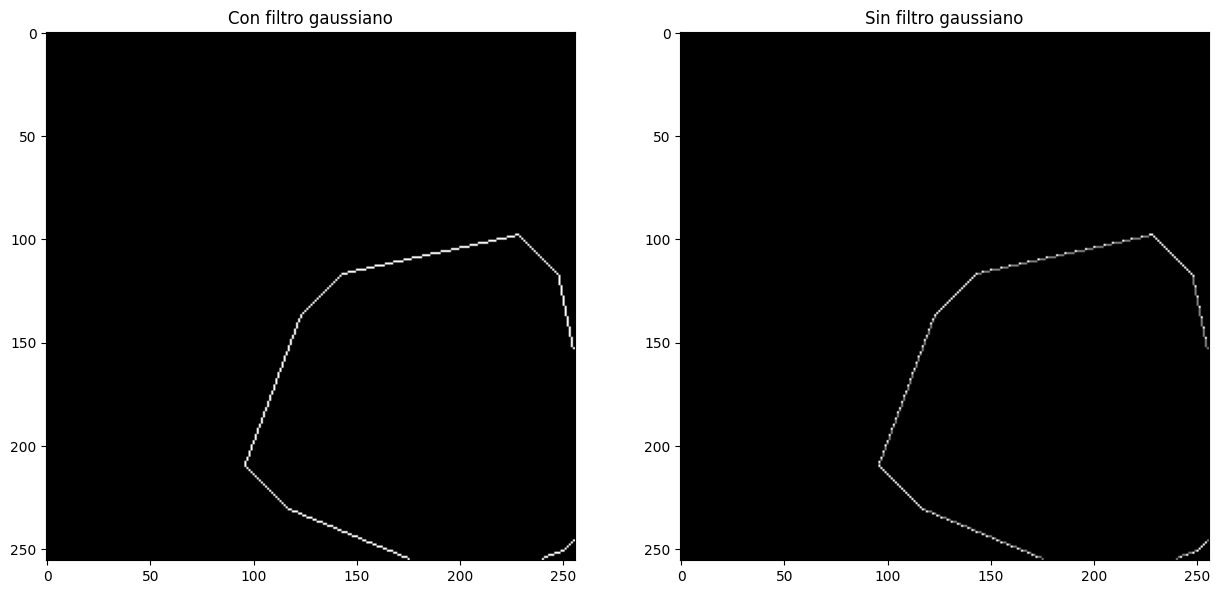

In [22]:
fig, axes = plt.subplots(1,2 , figsize = (15,10))
axes[0].imshow(spot_g_l_r, cmap= 'gray')
axes[1].imshow(spot_l_r, cmap= 'gray')

axes[0].set_title("Con filtro gaussiano")
axes[1].set_title("Sin filtro gaussiano")

plt.show()


Como se puede apreciar, agregar un filtro gaussiano hace que se cree un borde mejor definido. Esto debido a que el filtro reduce el ruido y suaviza la figura blanca de la imagen original. Lo que hace que se distinga mucho màs el borde de la figura.

### Repita los pasos 1 y 2, pero cambiando a 1 el valor de la varianza en el filtro gaussiano. ¿Cómo es la respuesta de este LoG con respecto al Laplaciano sin filtrado previo del ejercicio anterior? ¿A qué se debe este resultado?

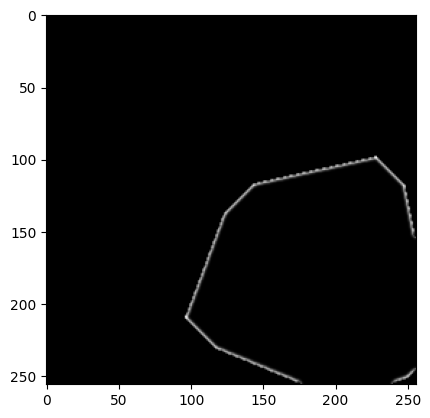

In [23]:
spot_g_1 = gaussian(spot, sigma=1, preserve_range=True)
spot_g_1 = laplace(spot_g_1, ksize=3)
spot_g_1 = exposure.rescale_intensity(spot_g_1, in_range=(0, 255))

plt.imshow(spot_g_1, cmap= 'gray')

plt.show()

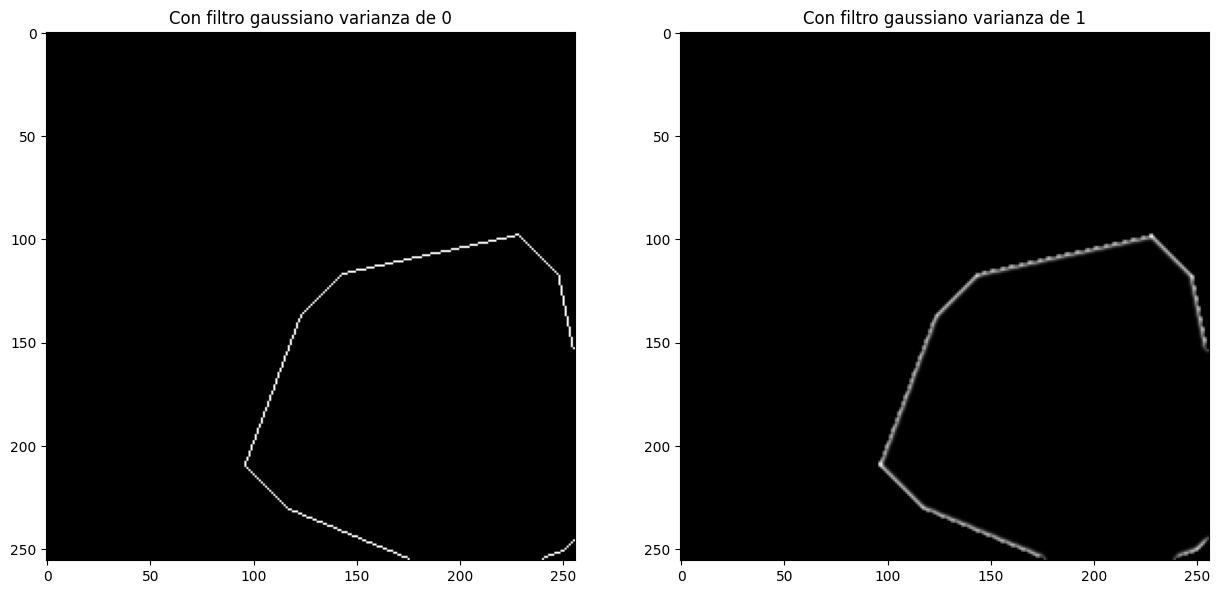

In [24]:
fig, axes = plt.subplots(1,2 , figsize = (15,10))
axes[0].imshow(spot_g_l_r, cmap= 'gray')
axes[1].imshow(spot_g_1, cmap= 'gray')

axes[0].set_title("Con filtro gaussiano varianza de 0")
axes[1].set_title("Con filtro gaussiano varianza de 1")

plt.show()

Como se puede apreciar, en la imagen de varianza 0 se tiene un borde más nitido, pero se nota más la forma de escalera de la lineas. Pero con varianza 1 se obtiene una linea más suave pero con más ruido. Esto se debe a que al aumentar la varianza de la distribución, la función de suavidad puede darle más rangos a los colores utilizados.

### Repita los pasos 1 y 2, pero cambiando a 2 el valor de la varianza en el filtro gaussiano. ¿Cómo es la respuesta de este LoG? ¿A qué se debe este resultado?

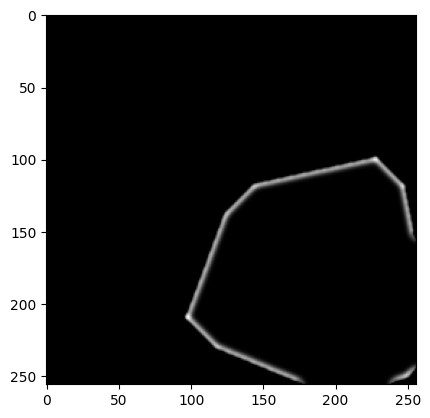

In [25]:
spot_g_2 = gaussian(spot, sigma=2, preserve_range=True)
spot_g_2 = laplace(spot_g_2, ksize=3)
spot_g_2 = exposure.rescale_intensity(spot_g_2, in_range=(0, 255))

plt.imshow(spot_g_2, cmap= 'gray')

plt.show()

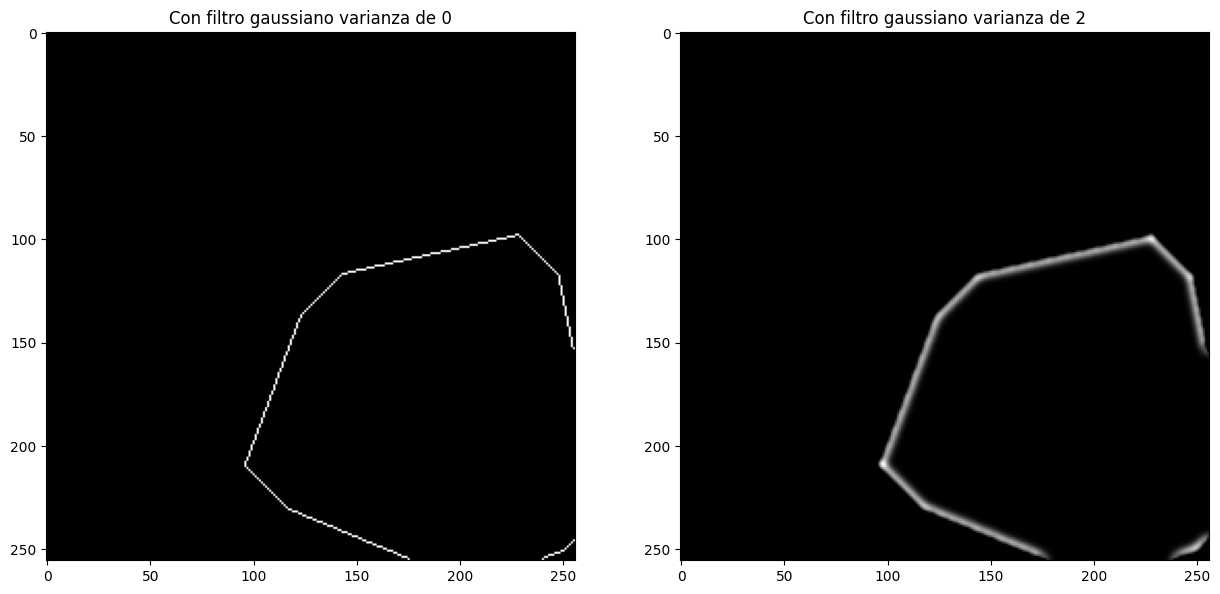

In [26]:
fig, axes = plt.subplots(1,2 , figsize = (15,10))
axes[0].imshow(spot_g_l_r, cmap= 'gray')
axes[1].imshow(spot_g_2, cmap= 'gray')

axes[0].set_title("Con filtro gaussiano varianza de 0")
axes[1].set_title("Con filtro gaussiano varianza de 2")

plt.show()

Como se puede apreciar, con varianza 2 la linea es mucho más suave, y se nota como una linea recta en vez de como una escalera (como con varianza 0). Esto se debe a que ahora la función de suavidad es más intensa y ahora le permite que los bordes sean más suaves. Esto a cambio de que el borde ocupe más espacio y esta se vea más borrosa.

## Comparación entre Sobel y LoG

### Cargue la imagen bruit y visualícela. Aplique un filtro gaussiano (con varianza igual a 1) y un filtro Laplaciano siguiendo los mismos pasos de los ejercicios previos. Visualice la imagen del LoG.

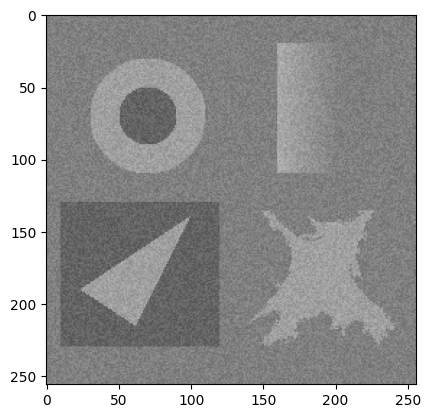

In [27]:
bruit = cv2.imread("images/bruit.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(bruit, cmap= 'gray', vmin = 0, vmax= 255)
plt.show()

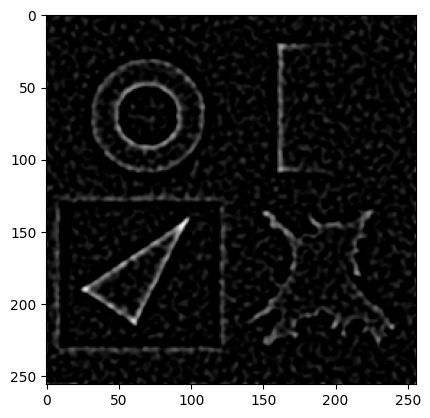

In [28]:
bruit_2 = gaussian(bruit, sigma=2, preserve_range=True)
bruit_2 = laplace(bruit_2, ksize=3)
bruit_2 = exposure.rescale_intensity(bruit_2, in_range=(0, 255))

plt.imshow(bruit_2, cmap= 'gray')

plt.show()

### Calcule sobre la misma imagen bruit la norma del gradiente utilizando el operador de Sobel. Para una mejor visualización, calibre el histograma de las imágenes resultantes.

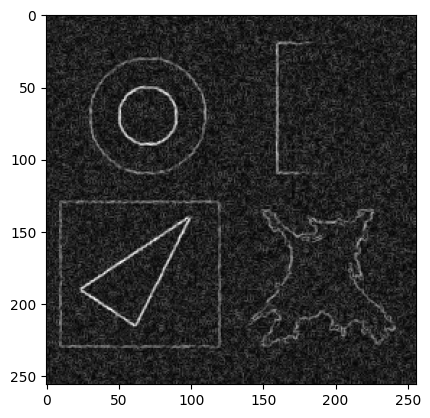

In [29]:
bruit_s = sobel(bruit)
bruit_s = exposure.rescale_intensity(bruit_s, in_range=(0, 255))

plt.imshow(bruit_s, cmap= 'gray')

plt.show()

### ¿En cuál de las dos imágenes es más fácil detectar los contornos. ¿Por qué ? ¿Cómo afecta el ruido la detección de los contornos en cada caso?

## Realce Laplaciano:

### Cargue la imagen film.png y visualícela.

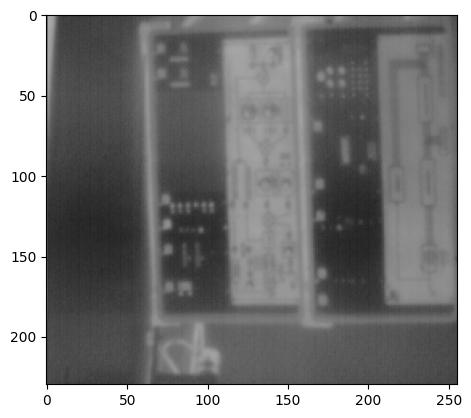

In [30]:
film = cv2.imread("images/film.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(film, cmap= 'gray', vmin = 0, vmax= 255)
plt.show()

### Aplique un filtro gaussiano (con varianza igual a 1) y un filtro Laplaciano siguiendo los mismos pasos de los ejercicios previos. Visualice la imagen del LoG.

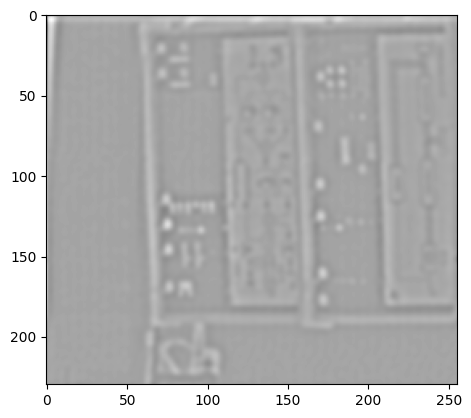

In [39]:
film_g = gaussian(film, sigma=2, preserve_range=True)
film_g = laplace(film_g, ksize=3)

plt.imshow(film_g, cmap= 'gray')

plt.show()

### Calibre el histograma de la imagen del LoG entre 0 y 255 y déjela de tipo UInt8.

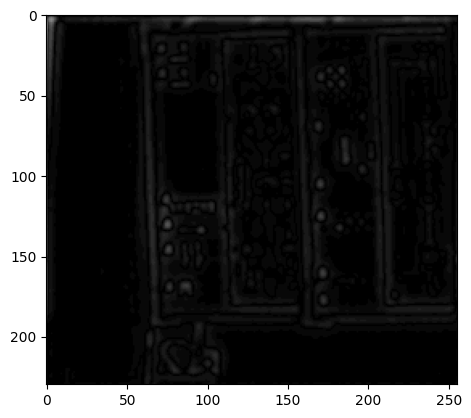

In [53]:
film_g_r = cv2.convertScaleAbs(film_g, alpha=1, beta=0)
film_g_r = np.uint8(film_g_r)
plt.imshow(film_g_r, cmap= 'gray')

plt.show()

### Combine esta última imagen (la del LoG calibrada) con 60% de la imagen inicial. Esto quiere decir multiplicar la imagen original por el valor 0.6 y sumarla a la imagen invertida del LoG. 

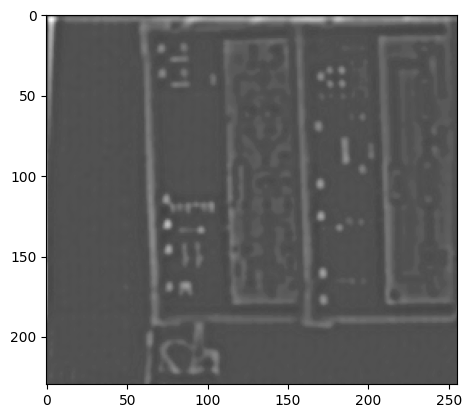

In [54]:
film_g_r_60 = (film_g_r * 0.6) + film_g
plt.imshow(film_g_r_60, cmap= 'gray')

plt.show()

### Para acentuar el interés del procesamiento, efectúe una ecualización del histograma de la imagen original y de la imagen combinada. Visualice el resultado. ¿Cuál es su conclusión?

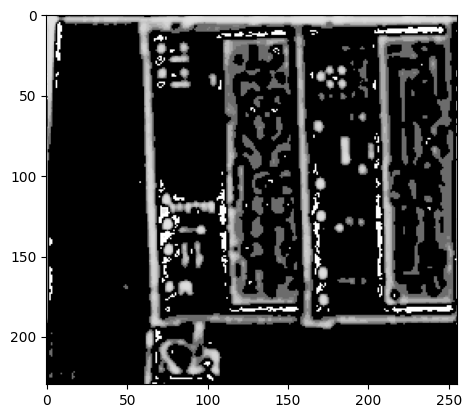

In [66]:
film_g_r_60_gray = film_g_r_60.astype(np.uint8)

film_g_r_60_eq = cv2.equalizeHist(film_g_r_60_gray)

# Display the result
plt.imshow(film_g_r_60_eq, cmap='gray')
plt.show()